# Homework 2: Randomized Block and Latin Square Designs
## Dr. Austin R. Brown
### School of Data Science & Analytics
### Kennesaw State University

**DUE: February 20, 2026**

**PART 1 INSTRUCTIONS:** You are an educational researcher interested in comparing different methods for teaching data science to undergraduate students. There are three different methods you are interested in comparing: (1) Direct Instruction (traditional method); (2) Inquiry-Based Learning (teacher facilitates student problem solving); (3) Collaborative Learning (students working in small groups). To compare these methods, you decide to randomly recruit undergraduate data science students to be part of a workshop on hypothesis testing basics. Students will be randomly assigned to one of three workshops, where each workshop employs a different teaching method. At the end of the workshop, students will be given a 50-question quiz where their understanding of hypothesis testing will be assessed. Percentage scores on this quiz serve as the outcome of interest.

However, it would be apparent that the prior level of knowledge a student possess about hypothesis testing may serve as a potential confounding variable that you would want to control for. Thus, the Prior Knowledge a given student has about hypothesis testing is categorized into "High" and "Low". The data from this experiment are contained in the `Data Science Teaching Method.xlsx` file. With these data, your tasks are:

**Question 1.** Briefly define the objective of this experiment



The objective of this experiment is to compare the effectiveness of three different teaching methods;Direct Instruction, Inquiry-Based Learning, and Collaborative Learning—on undergraduate students' understanding of hypothesis testing, while controlling for prior knowledge.

**Question 2.** Specify the outcome variable

The outcome variable is the percentage score on the 50-question hypothesis testing quiz.

**Question 3.** Specify the independent variable and blocking factor. What are some possible lurking variables?

The independent variable in this experiment is the teaching method, which includes Direct Instruction, Inquiry-Based Learning, and Collaborative Learning. The blocking factor is students' prior knowledge of hypothesis testing, categorized as High or Low.
Possible lurking variables that may influence quiz performance include student motivation, instructor effectiveness, study habits, and prior coursework in statistics or mathematics.


**Question 4.** Briefly explain why a randomized block design would be appropriate here. Similarly, explain why a completely randomized design would not be appropriate.

A randomized block design is appropriate because prior knowledge of hypothesis testing is likely to have a strong effect on quiz performance. Blocking students into High and Low prior knowledge groups reduces variability within groups and allows for a fairer comparison of teaching methods.

A completely randomized design would not be appropriate because differences in prior knowledge could confound the results, making it unclear whether differences in quiz scores are due to the teaching method or students' existing knowledge.


**Question 5.** State the null and alternative hypotheses for this experiment.

Null hypothesis (H₀): There is no difference in mean quiz scores among the three teaching methods.

Alternative hypothesis (H₁): At least one teaching method has a different mean quiz score compared to the others.



**Question 6.** Perform appropriate exploratory analysis, including summary statistics **and** data visualizations. Do the results of these analyses support the null or alternative hypothesis more strongly?


In [7]:
# === COURSE REPO SETUP === #

# 1. ENTER your GitHub username (the one that owns your fork)
github_username = "MihretTe"

# 2. Name of the repo (don't change unless your fork name is different)
repo_name = "STAT-7220-Applied-Experimental-Design"

# 3. Build the full repo URL for cloning
repo_url = f"https://github.com/{github_username}/{repo_name}.git"

import os

# --- Detect if we're already in a repo ---
cwd = os.getcwd()
if cwd.endswith(repo_name):
   print(f"✅ Already inside repo folder: {cwd}")
else:
    # --- If the repo folder exists, check if it's nested ---
    if os.path.exists(repo_name):
        print(f"⚠️ Found existing folder '{repo_name}'. Skipping clone to avoid nesting.")
    else:
       print(f"📥 Cloning repo from {repo_url}...")
       os.system(f"git clone {repo_url}")

    # --- Change to repo directory ---
    if os.path.exists(repo_name):
        os.chdir(repo_name)
        print(f"📂 Changed directory to: {os.getcwd()}")
    else:
        print("❌ ERROR: Repo folder not found. Please check your GitHub username.")

# --- Check if this is the instructor's repo instead of student's fork ---
# This command needs to be run from within the repository directory
remote_url = os.popen("git config --get remote.origin.url").read().strip()

if "abrown9008" in remote_url:
   print("⚠️ WARNING: You are working in the instructor's repo, not your fork!")
   print("💡 Please fork the repo to your own account and update `github_username` above.")
else:
    print(f"🔗 Connected to fork at: {remote_url}")

# Set Today's Directory #

today_dir = "Assignments/HW2"
os.chdir(today_dir)
print(f"📂 Changed directory to: {os.getcwd()}")

📥 Cloning repo from https://github.com/MihretTe/STAT-7220-Applied-Experimental-Design.git...
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design/Assignments/HW1/STAT-7220-Applied-Experimental-Design
🔗 Connected to fork at: https://github.com/MihretTe/STAT-7220-Applied-Experimental-Design.git
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design/Assignments/HW1/STAT-7220-Applied-Experimental-Design/Assignments/HW2


In [9]:
# By teaching method summary
summary_method = df.groupby("Teaching_Method")["Score"].agg(
    Mean="mean",
    Median="median",
    Std_Dev="std",
    Min="min",
    Max="max"
)

summary_method



,Mean,Median,Std_Dev,Min,Max
Teaching_Method,,,,,
Collaborative,87.1000,87.665,7.414661,70.47,101.29
Direct,77.4915,77.440,7.264446,62.49,93.11
Inquiry,82.1145,82.355,7.037525,71.40,93.90


In [10]:
# By teaching method and prior knowledge (blocking) summary
summary_block = df.groupby(
    ["Teaching_Method", "Prior_Knowledge"]
)["Score"].agg(
    Mean="mean",
    Median="median",
    Std_Dev="std",
    Min="min",
    Max="max"
)

summary_block


Mean  Median   Std_Dev    Min     Max
Teaching_Method Prior_Knowledge                                         
Collaborative   High             89.390  89.535  6.540866  78.79  101.29
                Low              84.810  84.280  7.850254  70.47   97.06
Direct          High             81.409  80.885  6.400299  72.85   93.11
                Low              73.574  72.835  6.028273  62.49   81.82
Inquiry         High             86.618  88.455  5.738629  75.69   93.90
                Low              77.611  75.705  5.153114  71.40   86.23

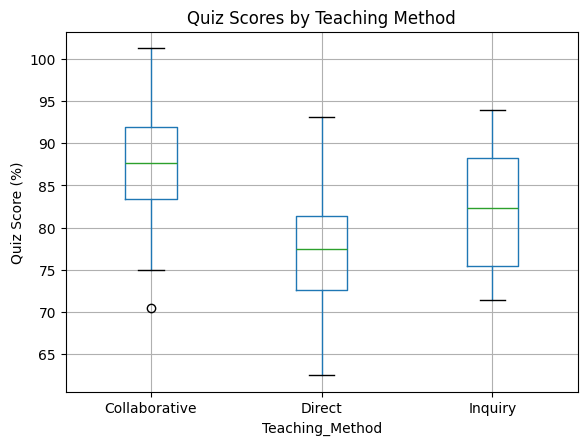

In [11]:
#Boxplot: Teaching Method
df.boxplot(column="Score", by="Teaching_Method")
plt.title("Quiz Scores by Teaching Method")
plt.suptitle("")
plt.ylabel("Quiz Score (%)")
plt.show()

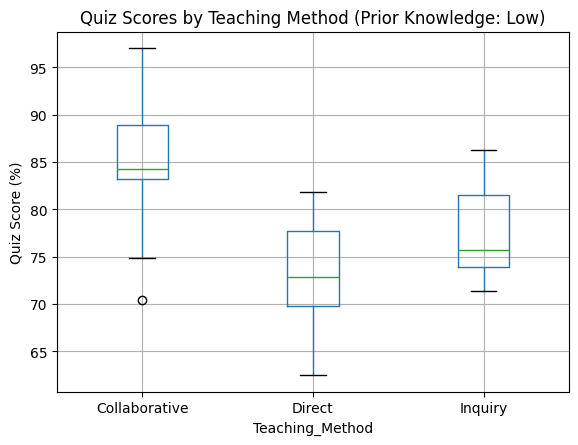

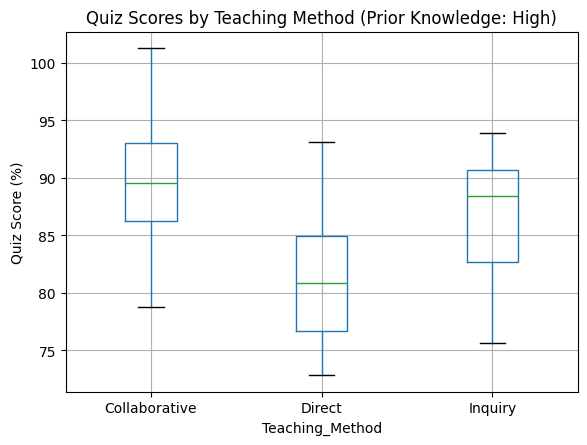

In [12]:
# Boxplots: Teaching Method within Prior Knowledge blocks
for level in df["Prior_Knowledge"].unique():
    subset = df[df["Prior_Knowledge"] == level]
    subset.boxplot(column="Score", by="Teaching_Method")
    plt.title(f"Quiz Scores by Teaching Method (Prior Knowledge: {level})")
    plt.suptitle("")
    plt.ylabel("Quiz Score (%)")
    plt.show()

**Question 7.** Build a two-way ANOVA model. Test the assumption of normality using **both** a visual method and a testing method. Do the results of the normality test(s) support the assumption of normality?



In [13]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit two-way ANOVA model (no interaction, consistent with randomized block design)
model = ols(
    "Score ~ C(Teaching_Method) + C(Prior_Knowledge)",
    data=df
).fit()

# ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Teaching_Method),923.670743,2.0,11.632036,0.000060
C(Prior_Knowledge),764.836807,1.0,19.263595,0.000051
Residual,2223.409543,56.0,NaN,NaN


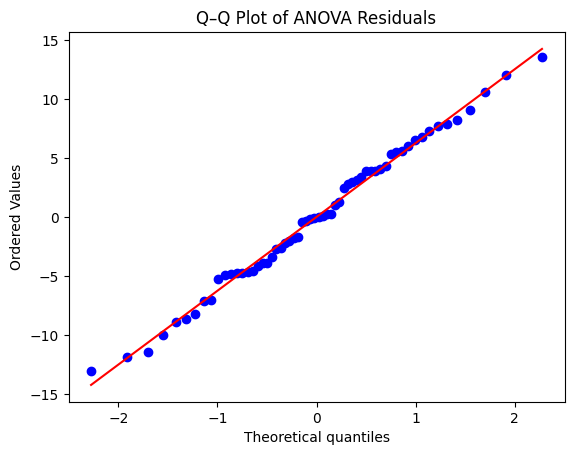

In [14]:
# Visual normality check
import matplotlib.pyplot as plt
import scipy.stats as stats

residuals = model.resid

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q–Q Plot of ANOVA Residuals")
plt.show()

In [15]:
# Formal normality test
shapiro_test = stats.shapiro(residuals)
shapiro_test

ShapiroResult(statistic=np.float64(0.9893192280271398), pvalue=np.float64(0.8794000184343089))


A two-way ANOVA was conducted with teaching method and prior knowledge as factors. Both teaching method (F(2,56)=11.63, p=0.00006) and prior knowledge (F(1,56)=19.26, p=0.00005) had significant effects on quiz scores. Normality of residuals was assessed using a Q-Q plot and the Shapiro-Wilk test (W=0.989, p=0.879). Both methods support the normality assumption, indicating that the ANOVA results are valid.


**Question 8.** Test the assumption of homogeneity of variance using **both** a visual method and a testing method. Do the results of the test(s) support the assumption of homogeneity of variance?

**Question 9.** Report the F-statistic and its associated p-value for the treatment effect. Which of our two hypotheses is more strongly supported? Why?

**Question 10.** If the data more strongly support the alternative hypothesis, perform Tukey's HSD post-hoc test to determine which levels of the treatment effect are significantly different from each other. If the data more strongly support the null hypothesis, explain why a post-hoc test would not be appropriate.

**Question 11.** Write a brief, contextual conclusion summarizing the results of your analyses, including potential limitations and future directions of this experiment.

**PART 2 INSTRUCTIONS**: Now suppose a university is evaluating the effectiveness of four different online learning platforms (say A, B, C, and D) on student engagement for students taking an undergraduate data science course in an online synchronous format. One section of the course is offered Monday through Thursday in the Morning, Early Afternoon, Mid-Afternoon, and Evening sections. Student engagement is measured through the total number of logins to the online learning platform for a given course section over the course of the
semester. Below is a table describing the study design and factors:


| Section \ Day     | Monday | Tuesday | Wednesday | Thursday |
|-------------------|--------|---------|-----------|----------|
| **Morning**       | A      | B       | C         | D        |
| **Early Afternoon** | B      | C       | D         | A        |
| **Mid-Afternoon** | C      | D       | A         | B        |
| **Evening**       | D      | A       | B         | C        |


Here, our main interest is in comparing engagement across the online learning platforms, but we also want to control for Day of the Week as well as Time of Day, as these could potentially be confounding variables. The data for this experiment are contained in the `Online Learning and Engagement.xlsx` file. With these data, your tasks are:

**Question 1.** Briefly define the objective of this experiment

**Question 2.** Specify the outcome variable

**Question 3.** Specify the independent variable and blocking factors. What are some other possible lurking variables?

**Question 4.** Briefly explain why a Latin Square Design would be appropriate here. Similarly, explain why a completely randomized design or randomized block design would not be appropriate.

**Question 5.** State the null and alternative hypotheses for this experiment.

**Question 6.** Perform appropriate exploratory analysis, including summary statistics **and** data visualizations. Do the results of these analyses support the null or alternative hypothesis more strongly?

**Question 7.** Build a three-way ANOVA model. Test the assumption of normality using **both** a visual method and a testing method. Do the results of the normality test(s) support the assumption of normality?

**Question 8.** Test the assumption of homogeneity of variance using **both** a visual method and a testing method. Do the results of the test(s) support the assumption of homogeneity of variance?

**Question 9.** Report the F-statistic and its associated p-value for the treatment effect. Which of our two hypotheses is more strongly supported? Why?

**Question 10.** If the data more strongly support the alternative hypothesis, perform Tukey's HSD post-hoc test to determine which levels of the treatment effect are significantly different from each other. If the data more strongly support the null hypothesis, explain why a post-hoc test would not be appropriate.

**Question 11.** Write a brief conclusion summarizing the results of your analyses, including potential limitations and future directions of this experiment.